In [ ]:
import numpy as np
import pandas_datareader as web
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from datetime import date, datetime, timedelta
plt.style.use('fivethirtyeight')

In [ ]:
df = web.DataReader("PETR4.SA", data_source="yahoo", start="2018-01-01", end="2019-12-31")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,16.549999,16.190001,16.190001,16.549999,33461800.0,14.856965
2018-01-03,16.719999,16.370001,16.490000,16.700001,55940900.0,14.991621
2018-01-04,16.959999,16.620001,16.780001,16.730000,37064900.0,15.018551
2018-01-05,16.860001,16.570000,16.700001,16.830000,26958200.0,15.108323
2018-01-08,17.030001,16.709999,16.740000,17.030001,28400000.0,15.287862
...,...,...,...,...,...,...
2019-12-20,30.600000,30.020000,30.600000,30.260000,93064900.0,28.879580
2019-12-23,30.500000,30.030001,30.190001,30.500000,21970200.0,29.108633
2019-12-26,30.930000,30.500000,30.590000,30.910000,24810500.0,29.499928


In [ ]:
df.shape

(492, 6)

In [ ]:
df_bovespa = web.DataReader("^BVSP", data_source="yahoo", start="2018-01-01", end="2019-12-31")
# df_bovespa.reset_index(inplace=True,drop=False)
df_bovespa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,77909.0,76403.0,76403.0,77891.0,2880300.0,77891.0
2018-01-03,78414.0,77602.0,77889.0,77995.0,3142200.0,77995.0
2018-01-04,79135.0,77998.0,77998.0,78647.0,3486100.0,78647.0
2018-01-05,79071.0,78218.0,78644.0,79071.0,2747100.0,79071.0
2018-01-08,79395.0,78631.0,79070.0,79379.0,2550800.0,79379.0
...,...,...,...,...,...,...
2019-12-20,115171.0,114526.0,115133.0,115121.0,6887400.0,115121.0
2019-12-23,115863.0,114964.0,115119.0,115863.0,3995200.0,115863.0
2019-12-26,117220.0,115673.0,115864.0,117203.0,3788900.0,117203.0


In [ ]:
df_bovespa.shape

(492, 6)

In [ ]:
df_dolar = web.DataReader("USDBRL=X", data_source="yahoo", start="2018-01-01", end="2019-12-31")
df_dolar

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,3.311700,3.309300,3.310500,3.307600,0.0,3.307600
2018-01-02,3.312700,3.258500,3.310800,3.311000,0.0,3.311000
2018-01-03,3.263800,3.241000,3.257400,3.257800,0.0,3.257800
2018-01-04,3.241000,3.221400,3.235600,3.235500,0.0,3.235500
2018-01-05,3.247900,3.225600,3.232800,3.233100,0.0,3.233100
...,...,...,...,...,...,...
2019-12-26,4.083600,4.045000,4.083000,4.083000,0.0,4.083000
2019-12-27,4.075362,4.032774,4.054700,4.054700,0.0,4.054700
2019-12-30,4.045137,4.009400,4.022300,4.022300,0.0,4.022300


In [ ]:
df = df.merge(df_bovespa, left_on='Date', right_on='Date', suffixes=('', '_bovespa'))
df = df.merge(df_dolar, left_on='Date', right_on='Date', suffixes=('', '_dolar'))

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,High_bovespa,Low_bovespa,Open_bovespa,Close_bovespa,Volume_bovespa,Adj Close_bovespa,High_dolar,Low_dolar,Open_dolar,Close_dolar,Volume_dolar,Adj Close_dolar
Date,,,,,,,,,,,,,,,,,,
2018-01-02,16.549999,16.190001,16.190001,16.549999,33461800.0,14.856965,77909.0,76403.0,76403.0,77891.0,2880300.0,77891.0,3.3127,3.2585,3.3108,3.3110,0.0,3.3110
2018-01-03,16.719999,16.370001,16.490000,16.700001,55940900.0,14.991621,78414.0,77602.0,77889.0,77995.0,3142200.0,77995.0,3.2638,3.2410,3.2574,3.2578,0.0,3.2578
2018-01-04,16.959999,16.620001,16.780001,16.730000,37064900.0,15.018551,79135.0,77998.0,77998.0,78647.0,3486100.0,78647.0,3.2410,3.2214,3.2356,3.2355,0.0,3.2355
2018-01-05,16.860001,16.570000,16.700001,16.830000,26958200.0,15.108323,79071.0,78218.0,78644.0,79071.0,2747100.0,79071.0,3.2479,3.2256,3.2328,3.2331,0.0,3.2331
2018-01-08,17.030001,16.709999,16.740000,17.030001,28400000.0,15.287862,79395.0,78631.0,79070.0,79379.0,2550800.0,79379.0,3.2435,3.2235,3.2281,3.2266,0.0,3.2266


In [ ]:
data = df.filter(["Close", "Volume", "Close_bovespa", "Volume_bovespa", "Close_dolar"])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .7)
training_data_len
dataset.shape

(418, 5)

In [ ]:
sc = StandardScaler()
sc = sc.fit(dataset)
scaled_data = sc.transform(dataset)

In [ ]:
scaled_data

array([[-1.86104813, -0.95107242, -1.2044797 , -1.06839533, -1.64673201],
       [-1.82403506, -0.14093653, -1.19483791, -0.86308806, -1.83512853],
       [-1.81663282, -0.82121844, -1.13439133, -0.59349978, -1.91409926],
       ...,
       [ 1.68230078, -1.26286108,  2.44011578, -0.3561304 ,  1.08714222],
       [ 1.58606792, -1.25620819,  2.37809313, -0.26441238,  0.98692277],
       [ 1.50217244, -1.36012813,  2.32524872, -0.45098408,  0.87218459]])

In [ ]:
train_data = scaled_data[0:training_data_len,:]
# print(train_data)
window = 60
X_train = []
y_train = []
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i,:])
    y_train.append(train_data[i, 0:1])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(233, 60, 5)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))

In [ ]:
X_train.shape

(233, 60, 5)

In [ ]:
units1=50
units2=50
units3=50
units4=50
mybatch = 32
myepochs = 25
unitsoutput = 1    

In [ ]:
# The GRU architecture
regressor = Sequential()
# First GRU layer with Dropout regularisation
regressor.add(GRU(units=units1, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
regressor.add(Dropout(0.2))
# Second GRU layer
regressor.add(GRU(units=units2, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
regressor.add(Dropout(0.2))
# Third GRU layer
regressor.add(GRU(units=units3, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
regressor.add(Dropout(0.2))
# Fourth GRU layer
regressor.add(GRU(units=units4, activation='tanh'))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=unitsoutput))
# Compiling the RNN
regressor.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressor.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_52 (GRU)                 (None, 60, 50)            8550      
_________________________________________________________________
dropout_52 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
gru_53 (GRU)                 (None, 60, 50)            15300     
_________________________________________________________________
dropout_53 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
gru_54 (GRU)                 (None, 60, 50)            15300     
_________________________________________________________________
dropout_54 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
gru_55 (GRU)                 (None, 50)              

In [ ]:
history = regressor.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
8/8 [==============================] - 7s 108ms/step - loss: 0.8152
Epoch 2/25
8/8 [==============================] - 1s 115ms/step - loss: 0.3796
Epoch 3/25
8/8 [==============================] - 1s 112ms/step - loss: 0.2603
Epoch 4/25
8/8 [==============================] - 1s 122ms/step - loss: 0.2044
Epoch 5/25
8/8 [==============================] - 1s 115ms/step - loss: 0.1507
Epoch 6/25
8/8 [==============================] - 1s 122ms/step - loss: 0.1532
Epoch 7/25
8/8 [==============================] - 1s 116ms/step - loss: 0.1667
Epoch 8/25
8/8 [==============================] - 1s 114ms/step - loss: 0.1223
Epoch 9/25
8/8 [==============================] - 1s 115ms/step - loss: 0.1178
Epoch 10/25
8/8 [==============================] - 1s 119ms/step - loss: 0.1362
Epoch 11/25
8/8 [==============================] - 1s 112ms/step - loss: 0.1208
Epoch 12/25
8/8 [==============================] - 1s 113ms/step - loss: 0.1377
Epoch 13/25
8/8 [==============================] 

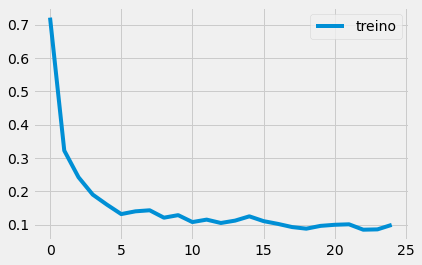

In [ ]:
plt.plot(history.history['loss'], label='treino')
plt.legend();

In [ ]:
test_data = scaled_data[training_data_len - window:, :]

X_test = []
y_test = dataset[training_data_len:, 0:1]

for i in range(window, len(test_data)): 
    X_test.append(test_data[i-window:i,:])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))
print(X_test.shape, X_train.shape)

(125, 60, 5) (233, 60, 5)


In [ ]:
predicted = regressor.predict(X_test)
volume = dataset[training_data_len:, 1:]
predicted = np.column_stack((predicted, volume))
predicted = sc.inverse_transform(predicted)

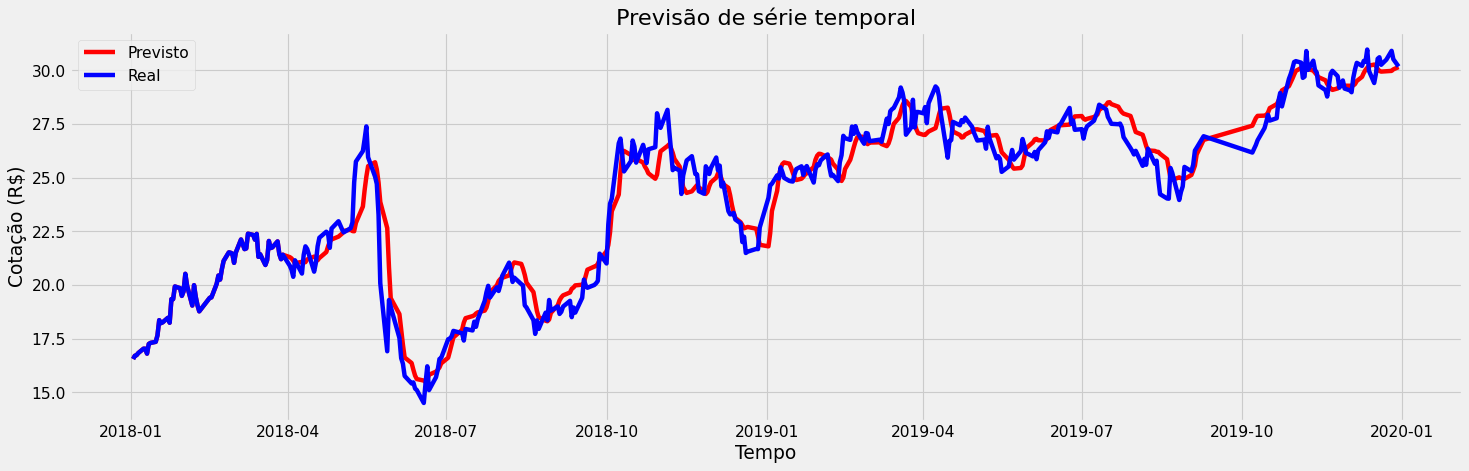

In [ ]:
allTargetData = np.vstack((dataset[:training_data_len, 0:1], dataset[training_data_len:, 0:1]))
training_predicted = regressor.predict(X_train)
volume = dataset[:len(X_train), 1:]
training_predicted = np.column_stack((training_predicted, volume))
training_predicted = sc.inverse_transform(training_predicted)
allForecastedData = np.vstack((dataset[0:window, 0:1], training_predicted[:,0:1], predicted[:,0:1]))
# date = df['DATA']
date = df.index

figure(figsize=(20, 6), dpi=80)
plt.plot(date, allForecastedData, color = 'red', label = 'Previsto')
plt.plot(date, allTargetData, color = 'blue', label = 'Real')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1]))
print('RMSE: ', rmse)

RMSE:  0.6854905071350006


In [ ]:
mse = mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1])
print('MSE: ',mse)

MSE:  0.46989723537220035


In [ ]:
mape = np.mean(np.abs((dataset[training_data_len:, 0:1]-predicted[:,0:1]) /dataset[training_data_len:, 0:1])) * 100
print('MAPE: ',mape, '%')

MAPE:  2.0790300788455673 %


In [ ]:
print('R2: ', r2_score(predicted[:,0:1], dataset[training_data_len:, 0:1]))

R2:  0.8119431556645178


In [ ]:
today = datetime.today()
today_minus_100 = today - timedelta(days=100)
df_new = web.DataReader("PETR4.SA", data_source="yahoo", start=today_minus_100, end=today)
df_bovespa_new = web.DataReader("^BVSP", data_source="yahoo", start=today_minus_100, end=today)
df_dolar_new = web.DataReader("USDBRL=X", data_source="yahoo", start=today_minus_100, end=today)
df_new = df_new.merge(df_bovespa_new, left_on='Date', right_on='Date', suffixes=('', '_bovespa'))
df_new = df_new.merge(df_dolar_new, left_on='Date', right_on='Date', suffixes=('', '_dolar'))
df_new = df_new.filter(["Close", "Volume", "Close_bovespa", "Volume_bovespa", "Close_dolar"])


print(df_new.tail())
last_days = df_new.values
scaled = sc.transform(last_days)
x = []
x.append(scaled)
x = np.array(x)
x = np.reshape(x, (x.shape[0], x.shape[1], -1))
pred_price = regressor.predict(x)
volume_new = last_days[0:1, 1:]
pred_price = np.column_stack((pred_price, volume_new))
pred_price = sc.inverse_transform(pred_price)
print(pred_price[0][0])

                Close      Volume  Close_bovespa  Volume_bovespa  Close_dolar
Date                                                                         
2021-04-07  24.000000  55892200.0       117624.0             0.0       5.6121
2021-04-08  23.700001  63231300.0       118313.0       8778200.0       5.5666
2021-04-12  23.889999  50592900.0       118812.0       7000500.0       5.7322
2021-04-13  23.969999  53612300.0       119297.0       8977600.0       5.7163
2021-04-14  24.350000  90836500.0       120295.0      10076600.0       5.6529
25.838576646679215
